In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import warnings
warnings.filterwarnings("ignore")

In [2]:
returns = pd.read_pickle("../Data/returns.pkl")
returns

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9660J1,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,NaN,NaN,NaN,NaN,0.136600,NaN,0.349877,NaN,NaN,NaN,...,0.376702,4.400221,1.590198,-0.991004,1.682900,3.364703,2.271817,0.634962,4.859794,1.204016
2021-05-25,NaN,NaN,NaN,NaN,0.946372,NaN,0.542355,NaN,NaN,NaN,...,0.230947,-0.288569,0.449063,-1.661106,0.439588,-0.548765,0.185928,0.727530,1.884279,-0.498203
2021-05-26,NaN,NaN,NaN,NaN,-1.393581,NaN,0.616491,NaN,NaN,NaN,...,1.296083,2.388001,-0.166049,3.255613,2.317760,4.702784,0.673960,2.336242,-0.429666,-1.520393


In [3]:
returns = returns.iloc[1:]

In [4]:
# dropping columns with all NaN
drop_columns = []

for col in returns.columns:
    if returns[col].isnull().all() == True:
        drop_columns.append(col)
        
returns.drop(columns=drop_columns, inplace=True)

In [5]:
def get_investable(t, n_rows):
    "Find stocks in investable universe at time t\
    (stocks in the S&P500 that have prices recorded for the last n_rows days)"
    
    df_investable = returns.copy(deep = True).sort_index(ascending = False)
    
    t_index = df_investable.index.get_loc(t)
    
    #take n_rows worth of data upto time specified
    df_investable = df_investable.iloc[t_index + 1:t_index + n_rows + 1]
    
    #find all stocks that exist in the S&P at this time period
    investable_universe = []
    for col in df_investable.columns:
        if ~df_investable[col].iloc[:n_rows].isna().any():
            investable_universe.append(col)
        
    df_investable = df_investable[investable_universe]
    
    return df_investable

In [6]:
t = pd.to_datetime("2020-02-25")

get_investable(t, 80)

,916328,936365,905271,905113,905802,905425,906156,916305,992816,921093,...,311917,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,-3.224700,-7.807808,-3.702396,-1.195098,-6.519714,-1.641923,-4.974055,-5.967078,-4.750040,-2.460137,...,-2.020070,-7.459489,-2.467504,-6.481638,-6.091830,-4.945782,-4.950192,-2.934848,-7.530828,-3.530293
2020-02-21,-1.141759,-6.966998,-0.168363,-0.682511,-0.463535,-0.654425,-1.230048,-2.409639,-2.263503,-0.746100,...,-1.364204,0.176838,-1.604162,0.595846,-4.036727,-0.943149,-3.189911,-0.666838,-1.943285,-1.020350
2020-02-20,-1.007162,-2.767402,-0.164178,-1.085978,1.809029,-1.082126,-0.255605,0.789314,-1.025895,0.591312,...,-0.471153,-1.963115,0.348053,2.656414,-1.813720,2.884097,-0.111152,0.610700,0.028798,-1.631715
2020-02-19,0.540054,3.533134,0.031282,2.682395,3.974485,-0.795553,0.980826,0.816160,1.448276,-1.079865,...,-1.072034,6.875586,0.767207,42.444610,1.149301,0.487541,0.806753,4.644464,0.915432,1.375625
2020-02-18,-0.869953,2.856626,-0.105465,-0.539684,1.325820,0.549345,-0.198719,1.093234,-1.831051,-0.714764,...,1.049026,7.295914,0.573192,-2.238988,-3.065014,0.135612,-2.341698,-1.907116,-0.159582,-0.317316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-04,-0.532301,4.012611,0.402697,0.841108,0.478886,-0.812313,0.402887,2.176339,0.656712,1.484798,...,-1.623956,1.327758,0.808427,-4.646840,3.548014,1.655398,-0.101695,1.448802,1.693443,-0.647981
2019-11-01,-1.136228,2.829355,0.140673,3.894889,4.806084,-0.879330,1.585948,1.510574,2.838077,0.927688,...,-0.091610,-0.511083,2.459839,-3.088008,3.775347,0.609899,3.800141,-4.949265,2.881394,2.108017
2019-10-31,-0.476134,2.414730,-1.601070,-0.217991,1.528721,0.308183,-0.669095,0.665273,2.260955,3.725635,...,0.210180,-0.028729,1.374046,3.571429,-1.160338,-2.448513,-0.984235,4.219273,0.947012,-1.946288


In [7]:
# Converts investable dataframe into 3D tensor for input into RNN fitting
# Eg. if investable_df has shape (52, 635), it is converted to a numpy array of shape (52, 1, 635)

def formatX(investable_df):
    train_values = []
    # Iterates through each day in investable df and appends feature values to train_values
    for i in range(len(investable_df.index)):
        train_values.append(investable_df.iloc[i].values)
    train_values = np.array(train_values) # converts to numpy array
    train_values = np.reshape(train_values, (train_values.shape[0], 1, train_values.shape[1])) # reshapes to 3-dimensional
    return train_values

In [8]:
formatX(get_investable(t, 80))

array([[[-3.22469983, -7.80780781, -3.70239636, ..., -2.93484809,
         -7.53082795, -3.53029256]],

       [[-1.14175899, -6.96699843, -0.16836335, ..., -0.66683765,
         -1.94328487, -1.02035   ]],

       [[-1.00716204, -2.76740238, -0.16417794, ...,  0.61070015,
          0.0287977 , -1.6317147 ]],

       ...,

       [[-0.47613379,  2.41472985, -1.60107046, ...,  4.21927269,
          0.9470124 , -1.94628847]],

       [[ 0.67106052,  0.30275507, -0.50041319, ...,  1.33406233,
         -1.1589035 ,  0.10572421]],

       [[ 0.95572224, -1.95903829,  2.99791943, ..., -1.93029491,
         -0.46583851,  0.94526605]]])

In [9]:
# Formats output for a stock as a np array
# Takes in a stock, a date, and a number of rows to look back on and formats the output values as a numpy array
# Eg. formatY(stockX, Feb.25, 80) outputs the returns for stockX starting from 80 days before Feb.25 up to Feb.25

def formatY(stock, t, n_rows):
    t_index = returns.index.get_loc(t)
    return returns[stock].iloc[t_index - n_rows:t_index + 1].shift(-1).iloc[:-1].values[::-1]

In [10]:
formatY("916328", t, 80)

array([-4.1356493 , -3.22469983, -1.14175899, -1.00716204,  0.54005401,
       -0.86995316,  1.10509698, -0.12388783, -0.42615229,  0.98527746,
        0.48935928, -1.78830893, -0.10049129,  1.50742378,  1.34390076,
       -0.09180629, -2.26558995,  0.02243662, -0.44672772, -0.0558098 ,
       -0.8960177 , -0.36371652, -1.23013281,  2.37378803,  0.82022472,
        0.81558677,  1.02998398,  1.91275951,  0.72838346, -0.28116214,
       -1.24942156,  0.2667904 ,  0.40764034, -0.55594163,  0.52392595,
       -1.21909143,  0.10361501,  0.06912442, -0.68649886,  0.13748854,
        0.        , -0.08013738,  0.79621509, -0.78992559,  0.48314736,
       -0.14932231,  0.76388889,  0.05790388,  0.44201466,  1.24838064,
        0.41390728,  0.8227018 , -1.88348152,  0.28155795,  0.07043907,
        0.97202466, -0.17749379, -1.10005851,  0.03512058,  0.        ,
        1.10072198,  0.89562933,  0.07170172, -0.25032781, -0.47455214,
        0.03560408, -1.69175125,  1.89015692, -0.11873664, -0.14

In [11]:
# Creating a Simple RNN for an inputted stock

def get_model(stock, investable_df):
    # Converts features and output values to a 3D tensor and numpy array respectively
    convertedX = formatX(investable_df)
    t_index = returns.index.get_loc(investable_df.index[0])
    t = returns.index[t_index + 1]
    convertedY = formatY(stock, t, len(investable_df.index))
    
    # Builds model with three layers (SimpleRNN, Dense, Dense)
    model = Sequential()
    model.add(SimpleRNN(units=32, input_shape=(convertedX.shape[1], convertedX.shape[2]), activation="relu"))
    model.add(Dense(8, activation="relu")) 
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    
    # Fits model on formatted inputs and outputs
    model.fit(convertedX, convertedY, epochs=100, batch_size=16, verbose=0)
    
    return model

In [12]:
# Predicts stock price at a given date
import datetime

# Number of days to look back at when training model
look_back = 80

def pred_date(stock, date):
    investable = get_investable(date, look_back + 1)
    
    # Checking for invalid inputs
    if stock not in investable.columns:
        print(stock + " is not in the investable universe")
        return
    if investable.shape[0] == 0:
        print("Investable universe is empty")
        return
    
    ''' investable.iloc[0:1] is the first row of the investable df 
    (i.e. the row we're using to predict the stock's return at time date) '''
    convertedX = formatX(investable.iloc[0:1])
    
    ''' We train the model on the day before date (the parameter) so that the date we're predicting
    for is not included in the training set'''
    model = get_model(stock, investable.iloc[1:])
    
    return model.predict(convertedX)[0, 0]

In [13]:
pred_date("916328", t)

-1.1770235

In [14]:
# Predicts returns for all stocks in the investable universe at a given date
def pred_date_all(date):
    investable = get_investable(date, look_back)
    df = pd.DataFrame()
    stocks = []
    predictions = []
    count = 0 # used to keep track of progress when running function
    for stock in investable.columns:
        stocks.append(stock)
        predictions.append(pred_date(stock, date))
        count += 1
        percent = count / len(investable.columns)
        print(str(percent * 100) + "% ")
    df["stock"] = stocks
    df["pred_" + date.strftime("%Y-%m-%d")] = predictions
    return df

In [52]:
pred_t = pred_date_all(t)

0.15748031496062992% 
0.31496062992125984% 
0.47244094488188976% 
0.6299212598425197% 
0.7874015748031495% 
0.9448818897637795% 
1.1023622047244095% 
1.2598425196850394% 
1.4173228346456692% 
1.574803149606299% 
1.7322834645669292% 
1.889763779527559% 
2.047244094488189% 
2.204724409448819% 
2.3622047244094486% 
2.5196850393700787% 
2.677165354330709% 
2.8346456692913384% 
2.9921259842519685% 
3.149606299212598% 
3.3070866141732282% 
3.4645669291338583% 
3.622047244094488% 
3.779527559055118% 
3.937007874015748% 
4.094488188976378% 
4.251968503937007% 
4.409448818897638% 
4.566929133858268% 
4.724409448818897% 
4.881889763779528% 
5.039370078740157% 
5.196850393700787% 
5.354330708661418% 
5.511811023622047% 
5.669291338582677% 
5.826771653543307% 
5.984251968503937% 
6.141732283464567% 
6.299212598425196% 
6.456692913385827% 
6.6141732283464565% 
6.771653543307086% 
6.929133858267717% 
7.086614173228346% 
7.244094488188976% 
7.4015748031496065% 
7.559055118110236% 
7.716535433070866% 

52.125984251968504% 
52.28346456692914% 
52.44094488188976% 
52.59842519685039% 
52.75590551181102% 
52.91338582677165% 
53.07086614173229% 
53.22834645669291% 
53.38582677165354% 
53.54330708661418% 
53.7007874015748% 
53.85826771653544% 
54.01574803149606% 
54.17322834645669% 
54.330708661417326% 
54.48818897637795% 
54.645669291338585% 
54.803149606299215% 
54.96062992125984% 
55.118110236220474% 
55.2755905511811% 
55.43307086614173% 
55.59055118110236% 
55.748031496062985% 
55.90551181102362% 
56.06299212598426% 
56.22047244094488% 
56.37795275590551% 
56.535433070866134% 
56.69291338582677% 
56.85039370078741% 
57.00787401574803% 
57.16535433070866% 
57.322834645669296% 
57.48031496062992% 
57.637795275590555% 
57.79527559055118% 
57.95275590551181% 
58.110236220472444% 
58.26771653543307% 
58.425196850393704% 
58.58267716535433% 
58.740157480314956% 
58.89763779527559% 
59.055118110236215% 
59.21259842519685% 
59.37007874015748% 
59.527559055118104% 
59.68503937007874% 
59.84251

In [53]:
pred_t

,stock,pred_2020-02-25
0,916328,-1.517719
1,936365,4.558343
2,905271,0.446249
3,905113,1.969357
4,905802,-1.538360
...,...,...
630,131745,1.883191
631,69487D,0.774155
632,68157P,-0.527928
633,9110RA,-0.553840


In [15]:
# Takes in output of pred_date_all and returns a portfolio and expected returns
def get_portfolio(predictions_df, num_stocks):
    pred_col = predictions_df.columns[-1]
    sorted_df = predictions_df.sort_values(by=pred_col, ascending=False)
    top = sorted_df.head(num_stocks)
    bot = sorted_df.tail(num_stocks)
    returns = top[pred_col].mean() - bot[pred_col].mean()
    return top, bot, returns

In [16]:
t = pd.to_datetime("2021-05-28")
test_size = 40
look_back = 240
investable = get_investable(t, look_back + test_size)

tts = investable.index[test_size]
delta = datetime.timedelta(days=1)

model = get_model("916328", investable.loc[tts:])

In [30]:
df = pd.DataFrame()
predictions = []
actuals = []
dates = []
for date in investable.index[:test_size]:
    convertedX = formatX(investable.loc[[date]])
    prediction = model.predict(convertedX)[0, 0]
    actual = investable.loc[date, "916328"].item()
    predictions.append(prediction)
    actuals = np.append(actuals, actual)
    dates.append(date)
df["predictions"] = np.array(predictions)
df["actuals"] = actuals
df["date"] = dates
df.set_index("date", inplace=True)
df

,predictions,actuals
date,,
2021-05-27,-0.507016,-0.907923
2021-05-26,0.139047,-1.393581
2021-05-25,-0.182040,0.946372
2021-05-24,-0.448098,0.136600
2021-05-21,0.367909,-0.568761
2021-05-20,-0.347925,1.220141
2021-05-19,0.288554,-0.512908
2021-05-18,0.468707,0.205585
2021-05-17,0.052629,-1.327022


(array([737881., 737888., 737895., 737902., 737911., 737918., 737925.,
        737932.]),
 <a list of 8 Text major ticklabel objects>)

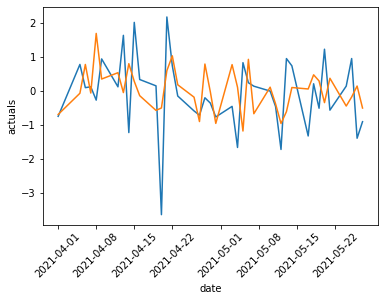

In [32]:
import matplotlib.pyplot as plt

sns.lineplot(data=df, x="date", y="actuals")
sns.lineplot(data=df, x="date", y="predictions")
plt.xticks(rotation=45)

In [33]:
# metrics for sample stock
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE: " + str(mean_squared_error(y_true=df.actuals, y_pred=df.predictions)))
print("MAE: " + str(mean_absolute_error(y_true=df.actuals, y_pred=df.predictions)))
print("R2: " + str(r2_score(y_true=df.actuals, y_pred=df.predictions)))

MSE: 1.3337396425017616
MAE: 0.9258222177499862
R2: -0.15414113091644466


In [35]:
def get_all_models(t, look_back):
    models = {}
    investable = get_investable(t, look_back)
    for stock in investable.columns:
        model = get_model(stock, investable)
        models[stock] = model
    return models

In [36]:
t = pd.to_datetime("2021-05-28")
look_back = 160

models = get_all_models(t, look_back)
models

{'916328': <keras.engine.sequential.Sequential at 0x7fb194eabe50>,
 '936365': <keras.engine.sequential.Sequential at 0x7fb194089a60>,
 '905271': <keras.engine.sequential.Sequential at 0x7fb194e90e80>,
 '905113': <keras.engine.sequential.Sequential at 0x7fb194d60cd0>,
 '905802': <keras.engine.sequential.Sequential at 0x7fb19464a310>,
 '905425': <keras.engine.sequential.Sequential at 0x7fb1944b0d60>,
 '906156': <keras.engine.sequential.Sequential at 0x7fb19ac39b50>,
 '916305': <keras.engine.sequential.Sequential at 0x7fb19b03ed90>,
 '992816': <keras.engine.sequential.Sequential at 0x7fb19e439ac0>,
 '921093': <keras.engine.sequential.Sequential at 0x7fb19e5707f0>,
 '905342': <keras.engine.sequential.Sequential at 0x7fb1aaa93f10>,
 '702259': <keras.engine.sequential.Sequential at 0x7fb19c769a00>,
 '912669': <keras.engine.sequential.Sequential at 0x7fb1ae6d6160>,
 '921161': <keras.engine.sequential.Sequential at 0x7fb17ee010d0>,
 '921431': <keras.engine.sequential.Sequential at 0x7fb180596c

In [71]:
def pred_future(models, days):
    investable = get_investable(t, 1)
    stocks = investable.columns
    df = returns.loc[[t], stocks]
    next_day = t
    for day in range(1, days + 1):
        features = df.iloc[[-1]]
        formatted = formatX(features)
        next_day += datetime.timedelta(days=1)
        if next_day.weekday() == 5: # if saturday, skip to monday
            next_day += datetime.timedelta(days=2)
        predictions = {"date": [next_day]}
        for stock in stocks:
            model = models[stock]
            predictions[stock] = [model.predict(formatted)[0, 0]]
        predictions = pd.DataFrame(predictions).set_index("date")
        df = pd.concat([df, predictions])
    return df

In [73]:
pred_future(models, 30)

,916328,936365,905271,905113,905802,905425,906156,916305,992816,921093,...,9660J1,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
2021-05-28,0.829804,2.116807,0.462619,0.000000,-1.608170,0.526008,0.244147,0.246633,-0.534802,-0.105105,...,-0.312589,-0.892462,-0.409679,0.519992,0.160551,-1.549363,0.570831,0.766354,-0.444733,1.742926
2021-05-31,-0.509291,-0.573790,0.323909,0.089057,0.054523,0.916805,-0.011330,0.082266,-0.746656,0.461709,...,0.179602,0.421438,0.197545,0.143248,0.727962,0.174189,-1.262374,-0.404112,-1.130809,0.545809
2021-06-01,0.111424,0.050586,0.163928,-0.201594,-0.024497,0.291107,-0.021987,-0.078583,-0.285478,0.151509,...,0.113316,0.710079,0.480169,-0.400450,0.724257,-0.509445,-0.653393,0.001987,-0.044897,0.423872
2021-06-02,0.082084,0.027278,0.014630,0.347845,-0.384814,0.440265,0.590095,0.330714,0.240124,0.018163,...,0.077153,0.712250,0.477691,-0.570796,0.260534,0.680015,0.059400,0.137396,-0.308625,0.062849
2021-06-03,0.166306,0.230331,-0.021791,0.135788,-0.038167,0.422191,0.015471,0.345263,-0.077594,0.121460,...,0.195739,-0.022656,0.096773,-0.023747,0.296657,0.638332,0.000415,0.027652,-0.182395,-0.130767
2021-06-04,-0.003134,0.124219,-0.056174,0.066443,0.092391,0.476522,0.117885,0.143639,-0.105560,-0.083958,...,-0.162515,0.028221,0.178356,0.231778,0.284143,0.629247,0.083060,0.041857,0.106517,-0.211907
2021-06-07,0.068906,0.044919,-0.064817,0.059047,-0.098588,0.494542,-0.123057,0.095795,-0.090215,-0.087910,...,-0.282472,-0.010779,0.172426,0.278852,0.306333,0.583192,-0.018673,0.063806,0.039783,-0.295877
2021-06-08,0.044445,0.050676,-0.026781,0.037179,-0.147690,0.470468,-0.057988,0.038304,-0.062210,-0.086420,...,-0.250471,0.205904,0.066195,0.326182,0.160045,0.483186,-0.068210,0.010190,0.003791,-0.268373
2021-06-09,0.023855,0.080943,-0.016536,0.096756,-0.179832,0.457856,-0.011411,0.051739,-0.055656,-0.083308,...,-0.258779,0.218311,0.116188,0.170602,0.151364,0.443926,0.008321,0.047858,0.064201,-0.294519
